In [4]:
import pandas as pd
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Загрузить файл hr.csv (можно найти во сложении к заданию)

1 Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение) 

2 Рассчитать и визуализировать корреляционную матрицу для переменных 

3 Визуализировать несколько взаимосвязей между переменными 

4 С использованием t-test статистики проверить взаимосвязи между несколькими переменными 

5 Рассчитать сколько работников работает в каждом департаменте 

6 Показать распределение сотрудников по зарплатам 

7 Показать распределение сотрудников по зарплатам совместно с департаментами 

8 Сколько сотрудников покинули компанию 

9 Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

10 Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import io
import requests
import seaborn as sns


# Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение) 

In [8]:
print('Медиана: ', statistics.median(df['satisfaction_level']))
print('Значение моды: ', statistics.mode(df['satisfaction_level']))
print('Минимум', min(df['satisfaction_level']))
print('Максимум', max(df['satisfaction_level']))
print('Стандартное отклоение', statistics.pstdev(df['satisfaction_level']))

Медиана:  0.64
Значение моды:  0.1
Минимум 0.09
Максимум 1.0
Стандартное отклоение 0.2486223626820733


# Рассчитать и визуализировать корреляционную матрицу для переменных 

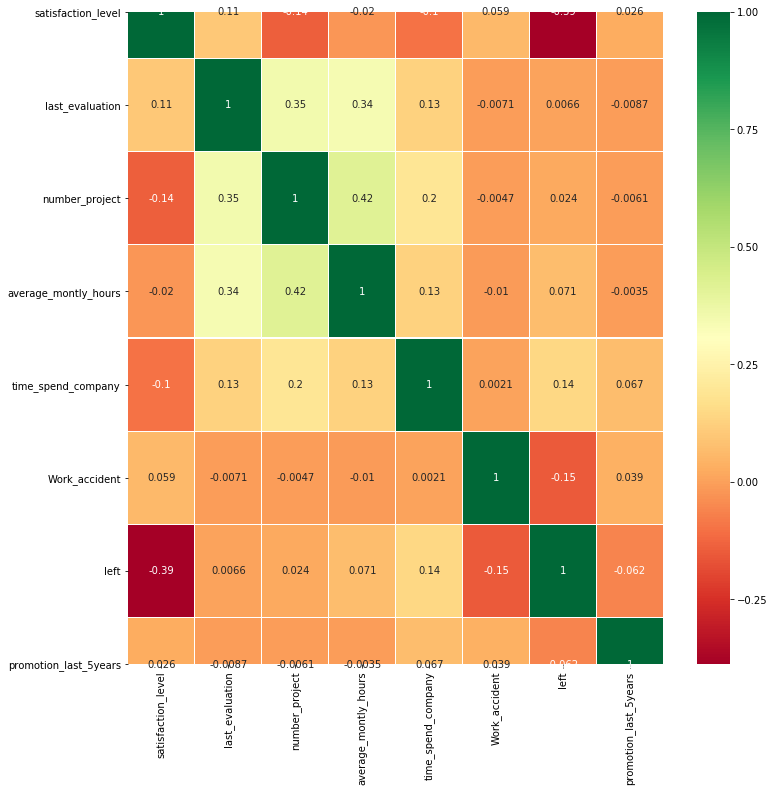

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

# Показать распределение сотрудников по зарплатам 

In [11]:
df1 = df.filter(items = ['salary'])
low = np.sum(df1['salary'] == 'low')
medium = np.sum(df1['salary'] == 'medium')
high = np.sum(df1['salary'] == 'high')


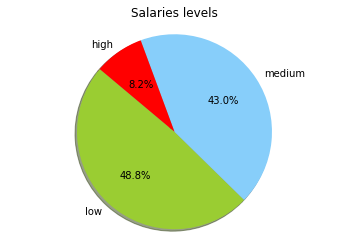

In [12]:
labels = 'low', 'medium', 'high'
sizes = [low, medium, high]
colors = ['yellowgreen', 'lightskyblue', 'red']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Salaries levels')
plt.show()

# Рассчитать сколько работников работает в каждом департаменте 

In [13]:
sales = df.groupby('sales').count()[['salary']]
sales.rename(columns={'salary': 'strength'})

,strength
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


# Сколько сотрудников покинули компанию 

In [14]:
left = df.groupby('left').count()[['sales']]
left.rename(columns={'sales': 'amount'})

,amount
left,
0,11428
1,3571


# Показать распределение сотрудников по зарплатам совместно с департаментами 

In [15]:
df.pivot_table(index = 'sales', columns = 'salary', values = 'left', aggfunc = 'count', fill_value = 0).head(10)

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


# Визуализировать несколько взаимосвязей между переменными 

Взаимосвязь департаментов и увольнений: Наибольшая текучка в продажах, тех. отделе и саппорте.

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7


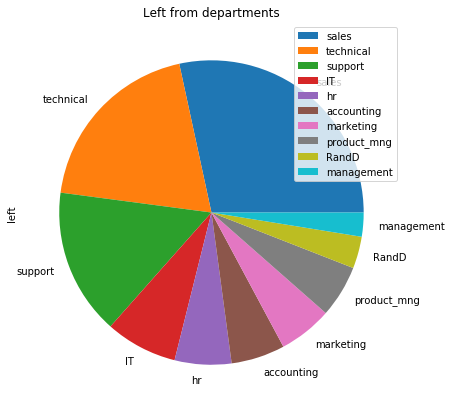

In [17]:
df3 = df.groupby(['sales']).sum().sort_values(by='left', ascending=False).head(10)
df3.plot(kind='pie', y ='left')
plt.title('Left from departments')
plt.show()

Визуализация повышений за последние 5 лет по отделам. 

In [18]:
df4 = df.pivot_table(index = 'sales', columns = 'promotion_last_5years', values = 'left', aggfunc = 'count', fill_value = 0)
df4

promotion_last_5years,0,1
sales,,
IT,1224,3
RandD,760,27
accounting,753,14
hr,724,15
management,561,69
marketing,815,43
product_mng,902,0
sales,4040,100
support,2209,20


In [19]:
df4.head().style.bar()

promotion_last_5years,0,1
sales,,
IT,1224,3
RandD,760,27
accounting,753,14
hr,724,15
management,561,69


Визуализация уровня удовлетворенности сотрудников

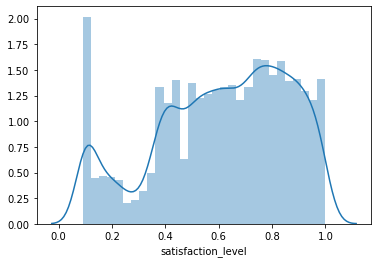

In [6]:
sns.distplot(df.satisfaction_level)

# С использованием t-test статистики проверить взаимосвязи между несколькими переменными 

In [23]:
promoted = df[df['promotion_last_5years']==1]['satisfaction_level']

notpromoted = df[df['promotion_last_5years']==0]['satisfaction_level']

print(stats.ttest_ind(promoted, notpromoted))

Ttest_indResult(statistic=3.1366967917856816, pvalue=0.0017119316267238923)


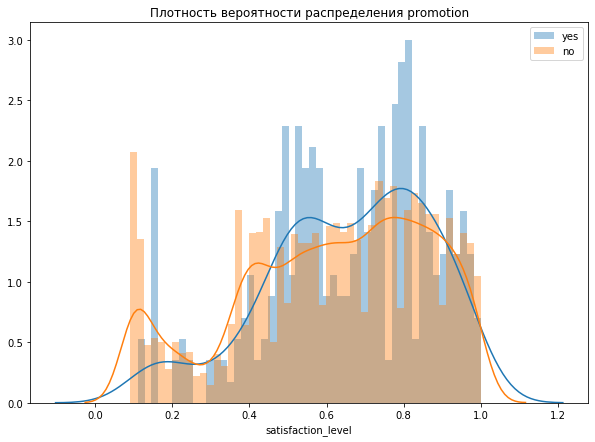

In [25]:
sns.distplot(promoted, 50)
sns.distplot(notpromoted, 50)
plt.title('Плотность вероятности распределения promotion')
plt.legend(['yes', 'no'])
plt.show()

Повышение за последние 5 лет повысило уровень удовлетворенности сотрудника

In [24]:
left = df[df['left']==1]['satisfaction_level']

notleft = df[df['left']==0]['satisfaction_level']

print(stats.ttest_ind(left, notleft))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)


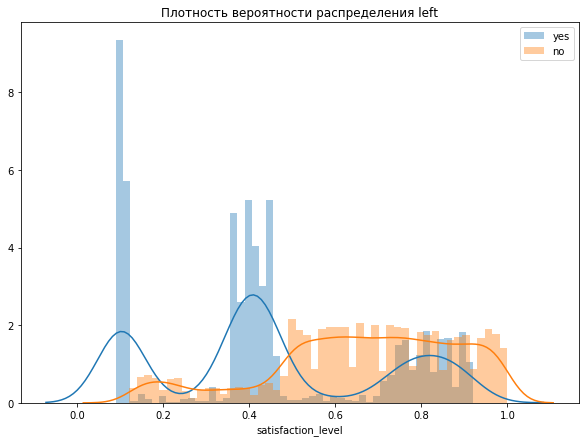

In [26]:
sns.distplot(left, 50)
sns.distplot(notleft, 50)
plt.title('Плотность вероятности распределения left')
plt.legend(['yes', 'no'])
plt.show()

Увольняются в основном сотрудники с низким уровнем удовлетворенности

# Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [37]:
import researchpy as rp

Тест гипотезы, что сотрудники без повышений за последние 5 лет увольняются чаще

In [34]:
nopr = df[df['promotion_last_5years']==0].left
pr = df[df['promotion_last_5years']==1].left

In [38]:
descriptives, results = rp.ttest(nopr, pr)

In [39]:
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
1      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1824
1        Degrees of freedom =   14997.0000
2                         t =       7.5812
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.4291
7                 Hedge's g =       0.4290
8             Glass's delta =       0.4259
9                         r =       0.0618


Отвергаем нулевую гипотезу, выборочные средние не равны.

Тест гипотезы, что сотрудники с увольняются из за несчастных случаев на работе

In [52]:
noacc = df[df['Work_accident']==0].left
acc = df[df['Work_accident']==1].left

In [53]:
descriptives, results = rp.ttest(noacc, acc)

In [54]:
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left  12830.0  0.265160  0.441435  0.003897   0.257521  0.272799
1      left   2169.0  0.077916  0.268101  0.005757   0.066627  0.089205
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1872
1        Degrees of freedom =   14997.0000
2                         t =      19.1658
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.4450
7                 Hedge's g =       0.4449
8             Glass's delta =       0.4242
9                         r =       0.1546


Отвергаем нулевую гипотезу, выборочные средние не равны.